In [2]:
import numpy as np
import pandas as pd

# data = pd.read_csv(r"C:\Users\clare\Documents\SHO-simulation\pendulum_simulation.csv", nrows=1000)

# data

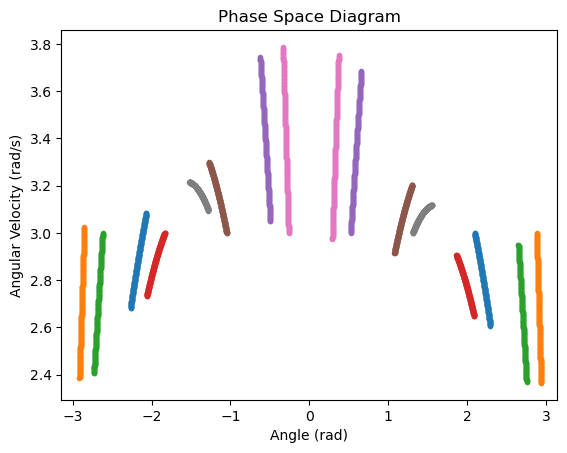

In [2]:
import matplotlib.pyplot as plt
import csv
import os
import math

def wrap_angle(angle):
    wrapped = math.fmod(angle, 2*math.pi)
    if wrapped >= math.pi:
        wrapped -= 2*math.pi
    elif wrapped < -math.pi:
        wrapped += 2*math.pi
    return wrapped

def plot_phase_space(folder_path, pic_name):
    files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    for filename in files:
        theta_vals = []
        omega_vals = []
        with open(os.path.join(folder_path, filename), 'r') as f:
            reader = csv.reader(f)
            next(reader)  
            for row in reader:
                angle = float(row[1])
                omega = float(row[2])
                angle = wrap_angle(angle)  # Apply wrapping here
                theta_vals.append(angle)
                omega_vals.append(omega)
        plt.plot(theta_vals, omega_vals, '.',label=filename)

    plt.xlabel('Angle (rad)')
    plt.ylabel('Angular Velocity (rad/s)')
    plt.xlim(-math.pi, math.pi)
    plt.title('Phase Space Diagram')
    plt.savefig(pic_name)
    plt.show()


plot_phase_space("SimulationResultO2", "Phase Space Test")


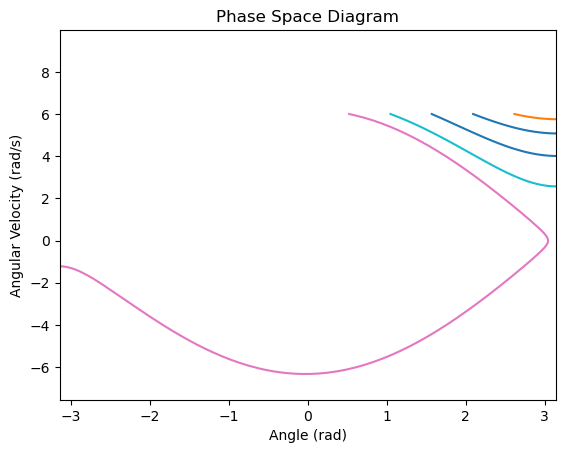

In [15]:
plot_phase_space("SimulationResultO2", "Phase Space (AngVelo=2)")